In [28]:
import torch
from torch import nn
import numpy as np

# for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns

%matplotlib widget

In [29]:
# Nothing to do here!
# Made up functions
# Made up ground truth function
def f(x: torch.tensor) -> torch.tensor:
    f = torch.exp(0.001*x)*torch.sin(0.5*x)/x + torch.log(x) + torch.sin(0.1*x)
    return f

# This function generates the observations
def obs(x: torch.tensor) -> torch.tensor:
    fx = f(x)
    eps = torch.randn(len(x)) * 0.5
    y = fx + eps
    return y


# Implement a simple fully connected network
A[1] - A[5]
- input dimension, output dimension as parameters)
- three hidden layers with dimensions: 64, 32, 16
- with ReLu activations
- use nn.Sequential for your network definition
- use the appropriate weight initialization (uniform or normal doesn't matter)

each of the steps above counts as 1 point i.e. the implementation in total is 5 points

In [4]:
# TODO! 
class NN(nn.Module):
    # TODO! implement initalization here
    def __init__(self, input_dim: int, output_dim: int) -> None:
        super(NN, self).__init__()
        self.input_layer = nn.Linear(in_features=input_dim, out_features=64)
        self.hidden_l1 = nn.Linear(in_features=64, out_features=32)
        self.hidden_l2 = nn.Linear(in_features=32, out_features=16)
        self.hidden_l3 = nn.Linear(in_features=16, out_features=16)
        self.out_layer = nn.Linear(in_features=16, out_features=output_dim)
    
    # TODO! implement forward here
    def forward(self, x: torch.tensor) -> torch.Tensor:
        x = torch.relu(self.input_layer(x))
        x = torch.relu(self.hidden_l1(x))
        x = torch.relu(self.hidden_l2(x))
        x = torch.relu(self.hidden_l3(x))
        x = self.out_layer(x)
        return x  

    # TODO! implement eright initialization here    
    def init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)
        # this is for zero'ing the biases - not necessary by task but helpful
        if module.bias is not None:
                module.bias.data.zero_()

        

# Mean Absolute Error
A[6]

MSE is prone to outliers. An alternative is the Mean Absolute Error:
$MAE =  \sum_{i=1}^N \| g(x_i) - y_i \|$ where $g$ is our model and $g(x_i)$ is the model response for the $i't$ input.

Implement the MAE below. You can look up notebook NB1.A - there the MSE is implemented. MAE is just slightly different! Hint: torch.abs() operates elementwise!

In [10]:
def MAE(y: torch.tensor, gx: torch.tensor) -> torch.tensor:
    # TODO!
    # implement the mae here
    delta = y - gx
    delta_abs = torch.abs(delta)
    mae = delta_abs.mean()
    return mae


# For comparison only: 
#def MSE(y: torch.tensor, gx: torch.tensor) -> torch.tensor:
#    delta = y - gx
#    delta_sq = delta * delta
#    mse = delta_sq.mean()
#    return mse

# Complete the training loop below!
A[7] fill in the missing code!

In [30]:

def train(model, optimizer):
    interval = torch.linspace(0.1,100,100) 
    fx = f(interval) 
    
    N_datapoints = 50
    x = torch.linspace(0.1,100,N_datapoints)
    y = obs(x)
    
    n_epoch = 5000
    loss_array = []
    fx_diff = []
    fx_epoch = []

    track_every = 500
    for epoch in range(n_epoch):
    
        # set all gradients to zero
        # TODO!    
        model.zero_grad()
        
        # apply neural network on all data points
        # TODO!
        out = model(x.view(-1,1))
    
        # calculate MAE loss
        # TODO!
        loss = MAE(y=y, gx=out.view(-1))
    
        # calculate gradients
        # TODO!
        loss.backward()
    
        # one step along the steppest descent
        # TODO!
        optimizer.step()
    
    
        # apply model on interval to calc diff to f
        if epoch % track_every == 0:
             # store loss vor visualization
            loss_array.append(loss.item())
            # apply model on interval to calc diff to f
            with torch.no_grad():
                out_f = model(interval.view(-1,1))
                diff = ((out_f.view(-1) - fx.view(-1)).abs()).mean()
                fx_diff.append(diff.item())
                fx_epoch.append(epoch)
        if epoch % track_every == 0:
            print(f'\r[{epoch}/{n_epoch}]: loss = {loss}', end="")
            
    return model, loss_array, fx_diff, fx_epoch, x, y

# Run the training 2 times
- [A8] once with the SGD optimizer
- [A9] once with the ADAM optimizer
    - you can play around with the learning rates
- [A10] currently we have not seen how to compare models. Do you see a differenc between the optimizers? Would you say one is better then the other? Why? Why not?

Train model with SGD

In [31]:
model = NN(1,1)

In [32]:
model, loss_array, fx_diff, fx_epoch, x, y = train(model, 
                                                   # TODO: add SGD optimizer as second argument! 
                                                   torch.optim.SGD(params=model.parameters(), lr=0.005)
                                                  )

[4500/5000]: loss = 0.5918326973915138

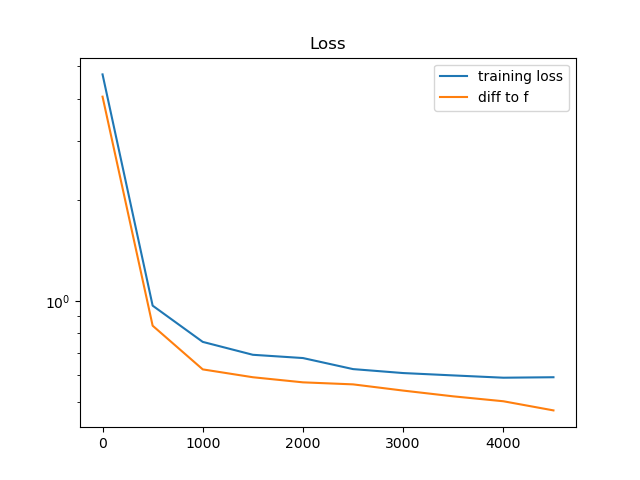

In [33]:
plt.close()    
plt.yscale('log')
plt.title('Loss')
plt.plot(fx_epoch,loss_array, label='training loss')
plt.plot(fx_epoch, fx_diff, label='diff to f')
plt.legend()
plt.show()

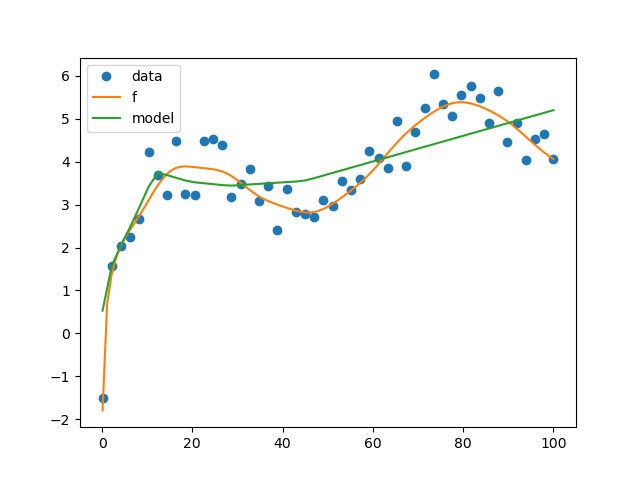

In [34]:
out = model(x.view(-1,1))
interval = torch.linspace(0.1,100,100) 
fx = f(interval) 

plt.close()
plt.plot(x, y, 'o', label='data')
plt.plot(interval, fx, label='f')
plt.plot(x, out.detach().squeeze(), label='model')
plt.legend()
plt.show()

Train model with ADAM

In [35]:
model = NN(1,1)

In [36]:
model, loss_array, fx_diff, fx_epoch, x, y = train(model, 
                                                   # TODO: add ADAM optimizer as second argument! 
                                                   torch.optim.Adam(params=model.parameters(), lr=0.1)
                                                  )

[4500/5000]: loss = 0.9971035718917847

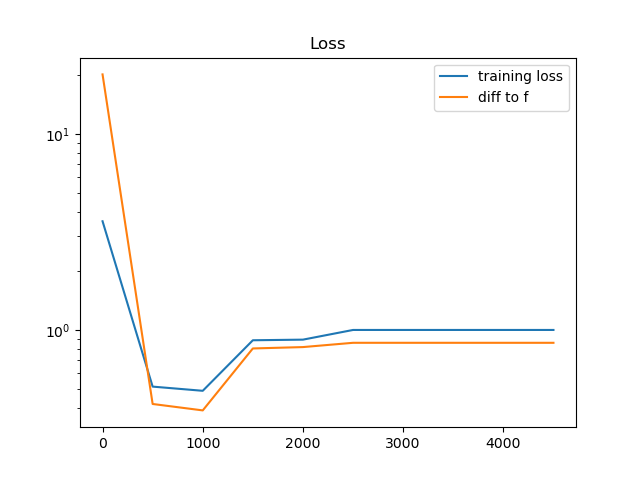

In [41]:
plt.close()    
plt.yscale('log')
plt.title('Loss')
plt.plot(fx_epoch,loss_array, label='training loss')
plt.plot(fx_epoch, fx_diff, label='diff to f')
plt.legend()
plt.show()

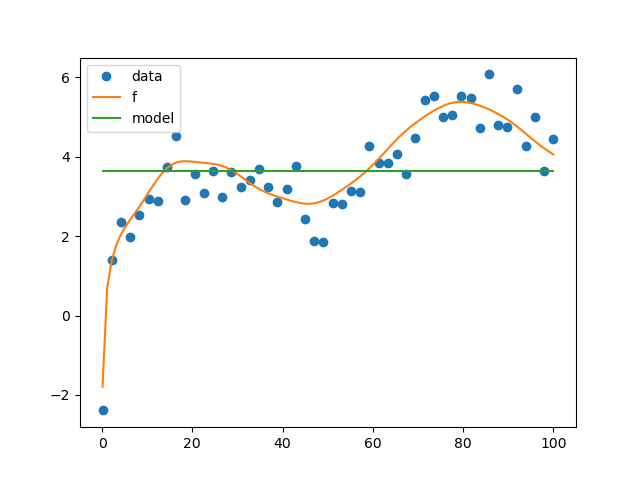

In [42]:
out = model(x.view(-1,1))
interval = torch.linspace(0.1,100,100) 
fx = f(interval) 

plt.close()
plt.plot(x, y, 'o', label='data')
plt.plot(interval, fx, label='f')
plt.plot(x, out.detach().squeeze(), label='model')
plt.legend()
plt.show()

very brief: do you see a differenc between the optimizers? Would you say one is better then the other? Why? Why not?

Add one or two sentences here:

- SGD trains a much simpler model than Adam does.
- Adam seems to be overfitting in some areas (which is caused by the much more complex model)
- Adam seem to overfit with the given hyperparameters in the last 1000 epochs but and has a more generalized model before
- Due to the more overfitting model of Adam the training loss is approximatly half. 
- I wouldn't call one or the other model better, usually it is dependant from the data which will be having better results, but given the observations stated above I think there should be awareness for adam beein prone to overfit.